In [8]:
import pandas as pd
import numpy as np
import yfinance as yf
from pyhhmm.gaussian import GaussianHMM

In [35]:
import matplotlib.pyplot as plt

In [9]:
from pandas_datareader import data as pdr

In [10]:
yf.pdr_override()

# Data Management

In [40]:
start_date = '2020-01-01'
end_data = '2024-04-01'
symbol = 'SPY'

In [41]:
data = pdr.get_data_yahoo(symbol, start = start_date,end = end_data)

[*********************100%%**********************]  1 of 1 completed


In [42]:
data.shape

(1067, 6)

In [43]:
data=data[['Open','High','Low','Adj Close','Volume']]

In [44]:
# Add Returns and Range
df = data.copy()
df['Returns'] = (df['Adj Close']/df['Adj Close'].shift(1)) - 1
df['Range'] = (df['High']/df['Low']) - 1
df.dropna(inplace = True)
df.head()

,Open,High,Low,Adj Close,Volume,Returns,Range
Date,,,,,,,
2020-01-03,321.160004,323.640015,321.100006,301.810760,77709700,-0.007572,0.007910
2020-01-06,320.489990,323.730011,320.359985,302.962219,55653900,0.003815,0.010519
2020-01-07,323.019989,323.540009,322.239990,302.110260,40496400,-0.002812,0.004034
2020-01-08,322.940002,325.779999,322.670013,303.720398,68296000,0.005330,0.009638
2020-01-09,326.160004,326.730011,325.519989,305.779785,48473300,0.006781,0.003717


In [45]:
#Structire Data
X_train = df[['Returns','Range']]
X_train.head()

,Returns,Range
Date,,
2020-01-03,-0.007572,0.007910
2020-01-06,0.003815,0.010519
2020-01-07,-0.002812,0.004034
2020-01-08,0.005330,0.009638
2020-01-09,0.006781,0.003717


### HMM Learning

In [46]:
#Train Model
model = GaussianHMM(n_states = 4, covariance_type = 'full', n_emissions = 2)
model.train([np.array(X_train.values)])

/opt/miniconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(<pyhhmm.gaussian.GaussianHMM at 0x7fad8efaf280>, 7171.601272711525)

In [47]:
#Check Results
hidden_states = model.predict([X_train.values])[0]
print(hidden_states[:40])

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 0 1 1 0
 1 1 2]


In [48]:
len(hidden_states)

1066

In [49]:
#Regime state means for each feature
model.means

array([[-0.00348953,  0.02003506],
       [-0.01324563,  0.03450791],
       [ 0.02851986,  0.0354698 ],
       [ 0.00234058,  0.00959102]])

In [50]:
#Regime state covars for each feature
model.covars

array([[[ 2.47776246e-04,  4.54388707e-05],
        [ 4.54388707e-05,  9.24833242e-05]],

       [[ 1.11600373e-03, -6.93605452e-05],
        [-6.93605452e-05,  4.06555787e-04]],

       [[ 9.87823271e-04,  9.46438226e-04],
        [ 9.46438226e-04,  9.90293139e-04]],

       [[ 6.84224794e-05,  1.87466674e-05],
        [ 1.87466674e-05,  3.06171622e-05]]])

### Data Visualization

In [51]:
# Structure the prices for plotting
i = 0 
labels_0 = []
labels_1 = []
labels_2 = []
labels_3 = []
prices = df['Adj Close'].values.astype(float)

for s in hidden_states:
    if s==0:
        labels_0.append(prices[i])
        labels_1.append(float('nan'))
        labels_2.append(float('nan'))
        labels_3.append(float('nan'))
    if s==1:
        labels_0.append(float('nan'))
        labels_1.append(prices[i])
        labels_2.append(float('nan'))
        labels_3.append(float('nan'))
    if s==2:
        labels_0.append(float('nan'))
        labels_1.append(float('nan'))
        labels_2.append(prices[i])
        labels_3.append(float('nan'))
    if s==3:
        labels_0.append(float('nan'))
        labels_1.append(float('nan'))
        labels_2.append(float('nan'))
        labels_3.append(prices[i])
    i+=1
        
    
        

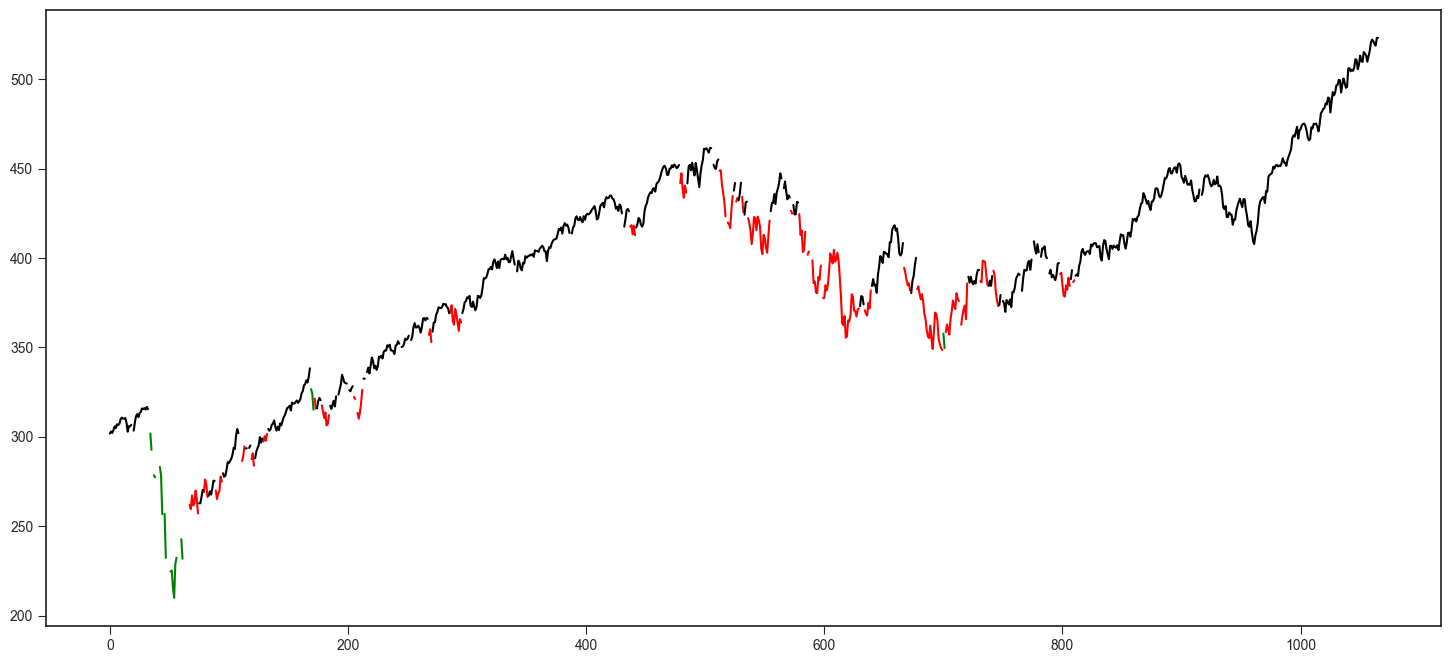

In [52]:
#Plot Chart
fig = plt.figure(figsize = (18,8))
plt.plot(labels_0,color = 'red')
plt.plot(labels_1,color = 'green')
plt.plot(labels_2,color = 'orange')
plt.plot(labels_3,color = 'black')
plt.show()